In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%config InlineBackend.figure_format = "retina"
#import seaborn as sns
#sns.set_theme()
#sns.set_palette("husl")

In [2]:
linestyle_tuple = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')] + [
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

np.random.shuffle(linestyle_tuple)

In [24]:
def grapher(vec,list_fun,list_cstr):
    
    ## common
    plt.figure(figsize=(9,6))
    plt.grid()
    plt.xlabel('$x$',fontsize=17)
    plt.ylabel('values',fontsize=17)
    plt.title('(MS) visualization: $n$ = '+str(len(list_fun))+', $m$ = '+str(len(list_cstr))+' with $\\mathcal{X} = \\mathbb{R}$',fontsize=18)
    
    BASE = np.inf
    
    ref = np.inf*np.ones(len(vec))
    
    ## fun
    for index_fun,fun in enumerate(list_fun):
        vals = fun(vec)
        BASE = min(min(vals),BASE)
        plt.plot(vec,vals,label='$f^{('+str(index_fun+1)+')}(x)$',linestyle=linestyle_tuple[index_fun][1],color='black')
        ref = np.minimum(vals,ref)
    BASE_save = BASE-3
    BASE -= 3
    
    dom = vec.copy()

    ## cstr 
    for index_cstr,cstr in enumerate(list_cstr):
        vals_cstr = cstr(vec)
        try:
            forbidden = vec[np.where(vals_cstr>0)[0]]
        except:
            fobideen = []
        if index_cstr==0:
            plt.scatter(forbidden,BASE*np.ones(len(forbidden)),color='red',label='$\\max_{j\in[m]}\,c^{(j)}(x)>0$')
        else:
            plt.scatter(forbidden,BASE*np.ones(len(forbidden)),color='red')
        dom = np.setdiff1d(dom,forbidden)
        
    ## F
    basic_ecart = vec[1]-vec[0]
    new_ref = np.inf*np.ones(len(dom))
    for index_fun,fun in enumerate(list_fun):
        vals = fun(dom)
        new_ref = np.minimum(vals,new_ref)
    # -> filter out
    filtered_new_ref = []
    filtered_new_dom = []
    for idx in np.arange(len(dom)-1):
        if dom[idx+1]-dom[idx]>basic_ecart:
            max_out_x = np.linspace(dom[idx]+basic_ecart/100,dom[idx+1]-basic_ecart/100,100)
            filtered_new_dom += list(max_out_x)
            filtered_new_ref += list(np.inf*np.ones(len(max_out_x)))
        else:
            filtered_new_dom += [dom[idx]]
            filtered_new_ref += [new_ref[idx]]
    filtered_new_dom.append(dom[-1])
    filtered_new_ref.append(new_ref[-1])
    plt.scatter(dom,BASE_save*np.ones(len(dom)),color='green',label='$\\max_{j\in[m]}\,c^{(j)}(x)\leq0$')
    plt.ylim([BASE-2,max(new_ref)*5])
    plt.plot(vec,ref,label='$\\min_{i \in [n]}\,f^{(i)}(x)$')
    plt.plot(filtered_new_dom,filtered_new_ref,color='tab:purple',label='$F(x)$',linewidth=3)
    argmin_F_id = np.argmin(filtered_new_ref)
    argmin_F = filtered_new_dom[argmin_F_id]
    min_F = filtered_new_ref[argmin_F_id]
    plt.scatter([argmin_F],[min_F],marker='*',color='tab:orange',label='global min.',s=100)
    plt.legend(bbox_to_anchor=(0.8, 0.8), loc="upper left",fontsize=13)
    plt.grid(True)
    #ax.grid(b=True, which='major', color='b', linestyle='-')

    plt.savefig('geometry_base.pdf',dpi=500)

In [25]:
x_vals = np.linspace(-10,10,300)
my_list_fun = [lambda u: 1/10*(u**2 - 2*u +1), lambda u: np.maximum(u-2,-2*u)-1, lambda u: np.exp(u/5)+1,lambda u:10*(u+4)**2]
my_list_cstr = [lambda u: 3/2-u**2,lambda u: u-5,lambda u: -u-5]

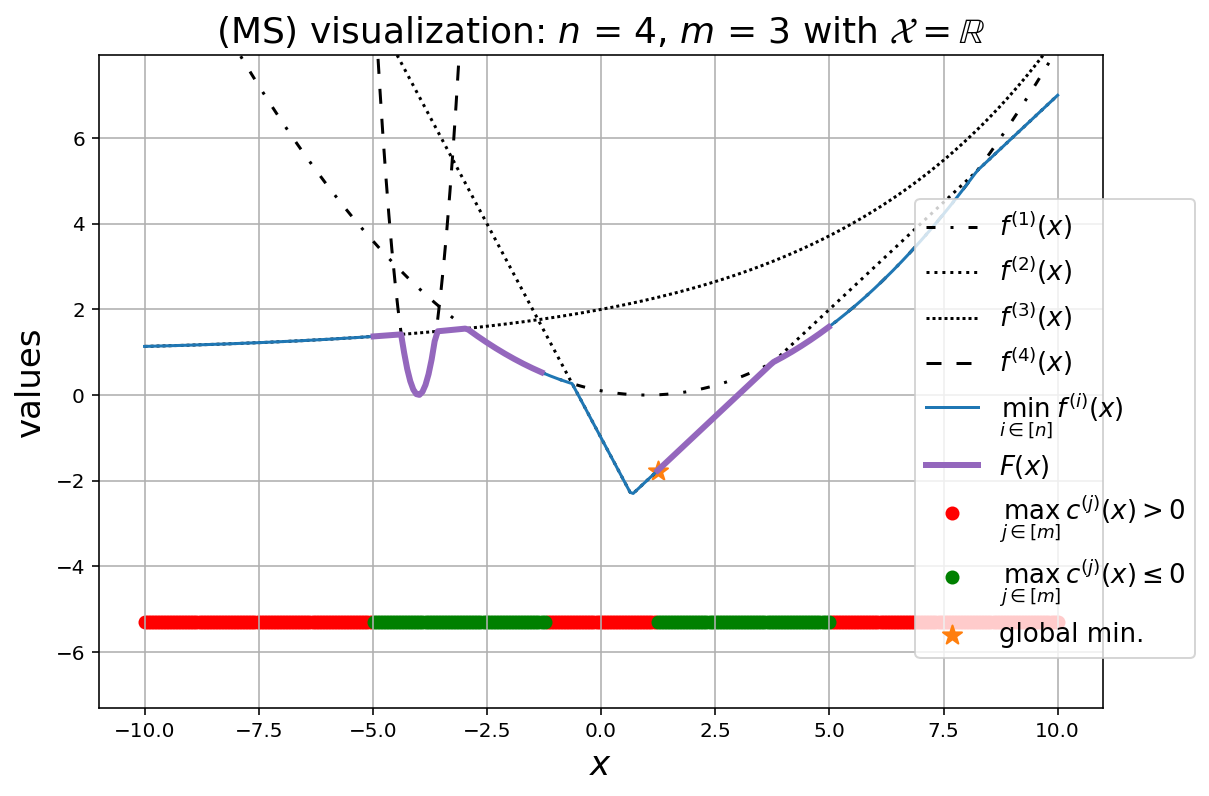

In [26]:
grapher(vec=x_vals,list_fun=my_list_fun,list_cstr=my_list_cstr)